##**Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.cluster import DBSCAN

###*Importing dataset from Google Drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Customer Segmentation/Mall_Customers.csv')

##**Data Preprocessing**

In [ ]:
del df['CustomerID']

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

###*Label Encoding*

In [ ]:
le = LabelEncoder()

In [ ]:
df.Gender

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [ ]:
df.Gender = le.fit_transform(df.Gender)
df.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

###*Standardization*

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

##**Exploratory Data Analysis**

###*Displaying few rows*

In [ ]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
61,1,19,46,55
11,0,35,19,99
144,1,25,77,12
74,1,59,54,47
53,1,59,43,60


In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


###*Checking for NULL values*

In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df.columns.dtype

dtype('O')

ScatterPlot

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

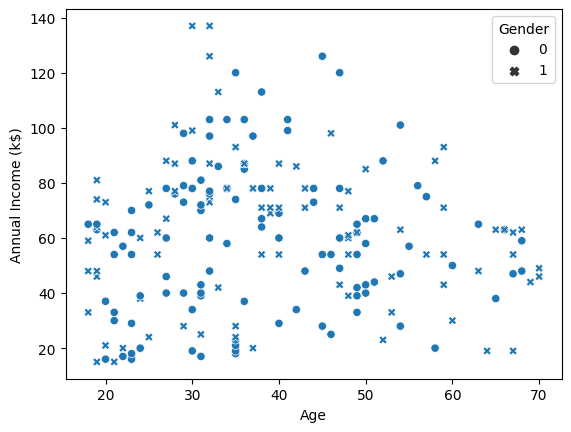

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Annual Income (k$)'], style=df['Gender'])

Boxplot

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

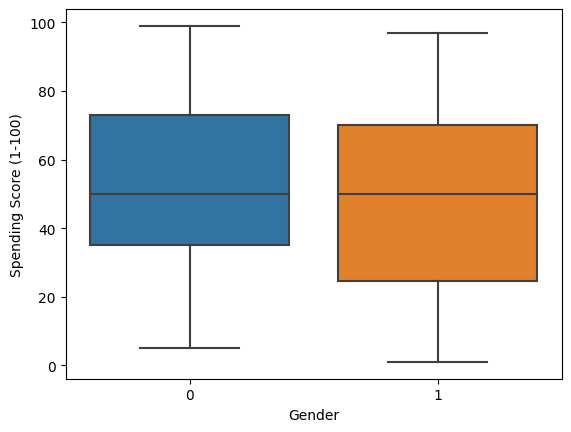

In [ ]:
sns.boxplot(y = df['Spending Score (1-100)'], x = df['Gender'])

Heatmap

<Axes: >

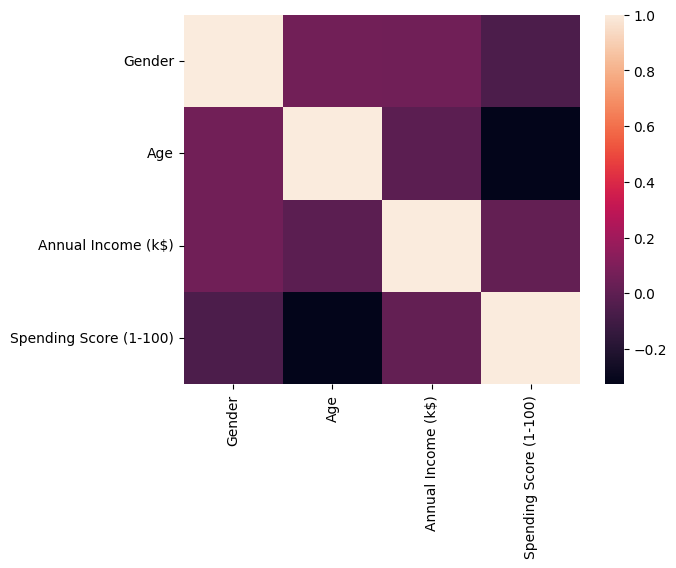

In [ ]:
sns.heatmap(df.corr())

Pie Chart

<Axes: ylabel='Spending Score (1-100)'>

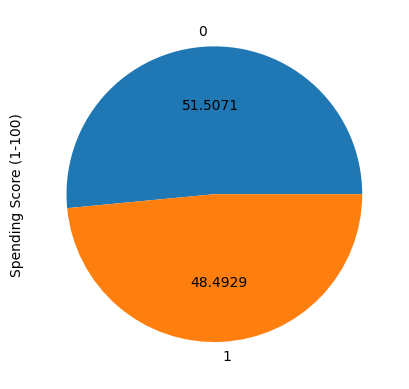

In [ ]:
(df.groupby('Gender').mean()['Spending Score (1-100)'] * 100).plot(kind = 'pie',autopct='%.4f')

<Axes: ylabel='Annual Income (k$)'>

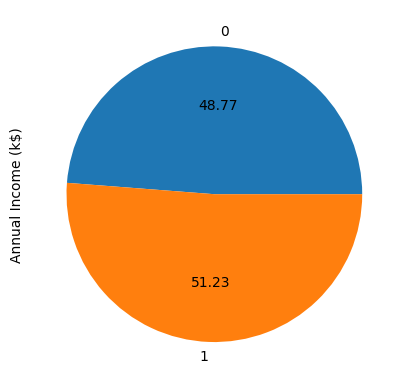

In [ ]:
(df.groupby('Gender').mean()['Annual Income (k$)'] * 100).plot(kind = 'pie',autopct='%.2f')

Histogram

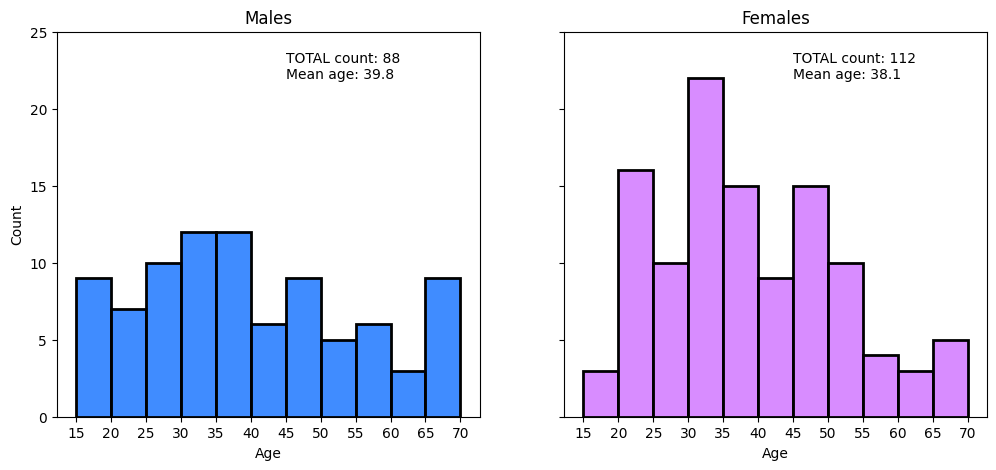

In [ ]:
# Filter data by gender
males_age = df.loc[df['Gender'] == 1, 'Age']
females_age = df.loc[df['Gender'] == 0, 'Age']

age_bins = range(15, 75, 5)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot males histogram
sns.histplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')

ax1.set_ylabel('Count')
ax1.text(45, 23, f"TOTAL count: {males_age.count()}")
ax1.text(45, 22, f"Mean age: {males_age.mean():.1f}")

# Plot females histogram
sns.histplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45, 23, f"TOTAL count: {females_age.count()}")
ax2.text(45, 22, f"Mean age: {females_age.mean():.1f}")

plt.show()

In [ ]:
medians_by_age_group = df.groupby(["Gender",pd.cut(df['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

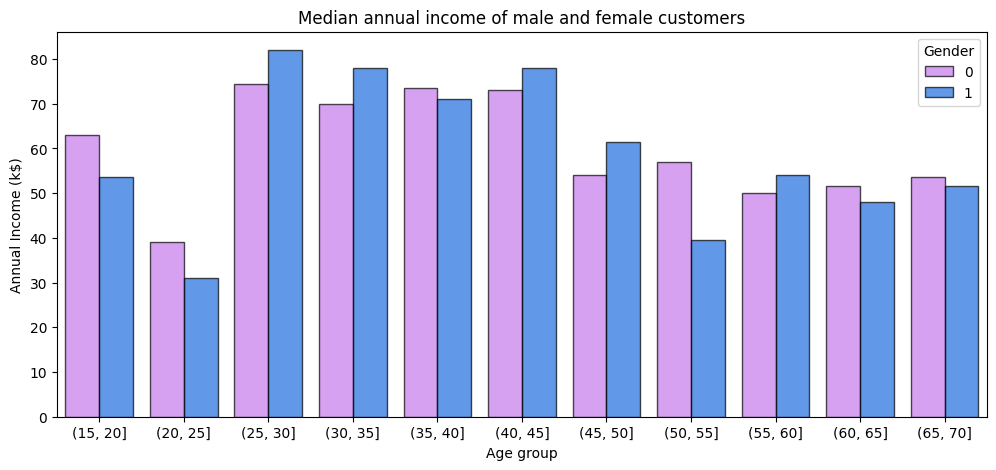

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

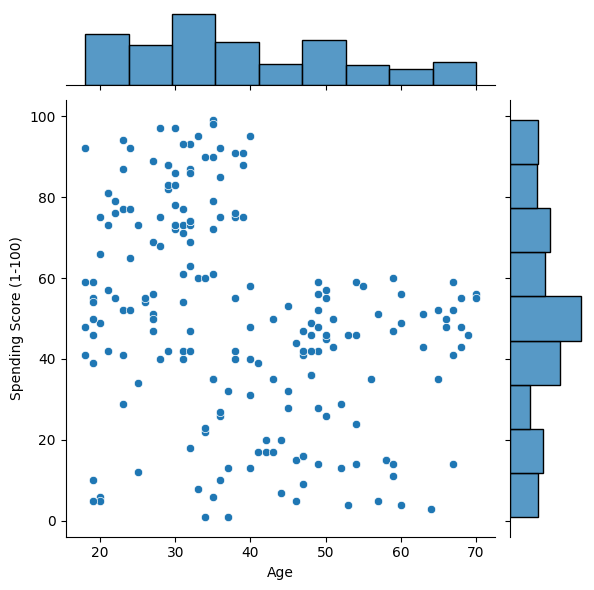

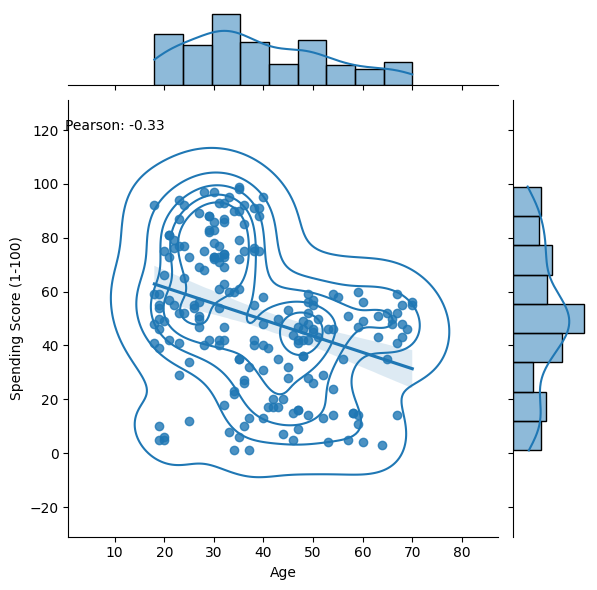

In [ ]:
sns.jointplot(data=df, x = 'Age', y = 'Spending Score (1-100)')

# calculating Pearson's correlation
corr, _ = pearsonr(x =  df['Age'], y = df['Spending Score (1-100)'])

jp = (sns.jointplot(data=df, x = df['Age'], y = df['Spending Score (1-100)'],
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

##**Model Training**

In [ ]:
dbscan=DBSCAN()

In [ ]:
dbscan=DBSCAN(eps=0.70, min_samples=6)

dbscan.fit(df_scaled)

DBSCAN(eps=0.7, min_samples=6)

In [ ]:
DBSCAN_labels=dbscan.labels_
DBSCAN_labels

array([-1,  1, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  1, -1,
        1, -1, -1, -1,  1,  0,  1, -1,  1,  0, -1,  0,  0, -1,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  2,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  2,  0,  2,  0,  2,  0,  2,  2,  3,  0,  0,  2,  3,  0,  0,
        3,  0,  2,  0,  0,  0,  2,  3,  0,  2,  0,  0,  2, -1,  2,  0,  0,
        2,  0,  0,  0,  0,  0,  3,  2,  0,  0,  3,  0,  0,  2,  3,  0,  0,
        2,  3,  2,  0,  0,  2,  2,  2,  2,  0,  0,  3,  0,  0,  0,  0,  0,
        0,  3,  0,  0,  4,  0,  5,  2,  4, -1,  4,  7,  4,  0,  5, -1,  5,
       -1,  6, -1,  5, -1,  4,  0,  5, -1,  4,  2,  5, -1,  4,  7,  4, -1,
        5, -1,  5,  7,  5,  7,  5,  0,  5, -1,  5,  7,  5,  7,  5, -1,  6,
        7,  6,  7,  4, -1,  5, -1,  6, -1,  4, -1,  5,  7,  5, -1,  4, -1,
       -1, -1,  5, -1,  5, -1,  5, -1,  5, -1, -1, -1, -1])

###*DBSCAN Clustering Plot*

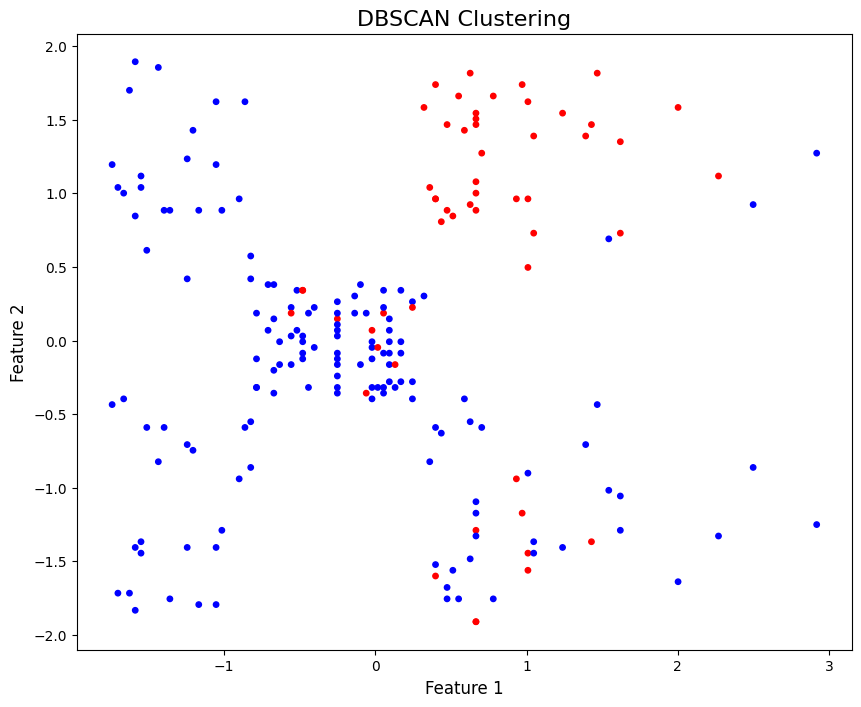

In [ ]:
colors=['blue','red']

# Plotting resulting clusters
plt.figure(figsize=(10,8))
plt.scatter(df_scaled[:,2],df_scaled[:,3],c=DBSCAN_labels,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=16)
plt.xlabel('Feature 1',fontsize=12)
plt.ylabel('Feature 2',fontsize=12)
plt.show()